In [126]:
import pandas as pd
import requests
import geopandas as gpd
from matplotlib import pyplot as plt

min_city=["Sydney","Melbourne","Brisbane","Perth","Adelaide","Gold Coast","Canberra","Cranbourne","Newcastle","Wollongong"]
cit_dict = {}
with open("au.csv", 'r') as au:
    city = au.readlines()
    count=0
    for i in city[1:]:
        data = i.split(",")
        if data[0] in min_city:
           count+=1
           cit_dict[data[0]] = {"lat": data[1], "lng": data[2]}
        if count==10:
            break

for j in cit_dict.keys():
    lat = cit_dict[j]["lat"]
    lng = cit_dict[j]["lng"]
    Weather = f"https://www.7timer.info/bin/civil.php?lat={lat}&lng={lng}.9631&ac=1&unit=metric&output=json&product=two"
    weather_res = requests.get(Weather)
    for i in weather_res.json()["dataseries"]:
        if 2 < i['timepoint']:
            cit_dict[j]["temperature"]=i["temp2m"]
            cit_dict[j]["weather"]=i["weather"]
            break
print(cit_dict)



{'Sydney': {'lat': '-33.8650', 'lng': '151.2094', 'temperature': 17, 'weather': 'clearday'}, 'Melbourne': {'lat': '-37.8136', 'lng': '144.9631', 'temperature': 17, 'weather': 'cloudyday'}, 'Brisbane': {'lat': '-27.4678', 'lng': '153.0281', 'temperature': 21, 'weather': 'mcloudyday'}, 'Perth': {'lat': '-31.9522', 'lng': '115.8589', 'temperature': 18, 'weather': 'pcloudyday'}, 'Adelaide': {'lat': '-34.9289', 'lng': '138.6011', 'temperature': 18, 'weather': 'pcloudyday'}, 'Gold Coast': {'lat': '-28.0167', 'lng': '153.4000', 'temperature': 21, 'weather': 'mcloudyday'}, 'Cranbourne': {'lat': '-38.0996', 'lng': '145.2834', 'temperature': 17, 'weather': 'mcloudyday'}, 'Canberra': {'lat': '-35.2931', 'lng': '149.1269', 'temperature': 18, 'weather': 'mcloudyday'}, 'Newcastle': {'lat': '-32.9167', 'lng': '151.7500', 'temperature': 18, 'weather': 'clearday'}, 'Wollongong': {'lat': '-34.4331', 'lng': '150.8831', 'temperature': 17, 'weather': 'clearday'}}


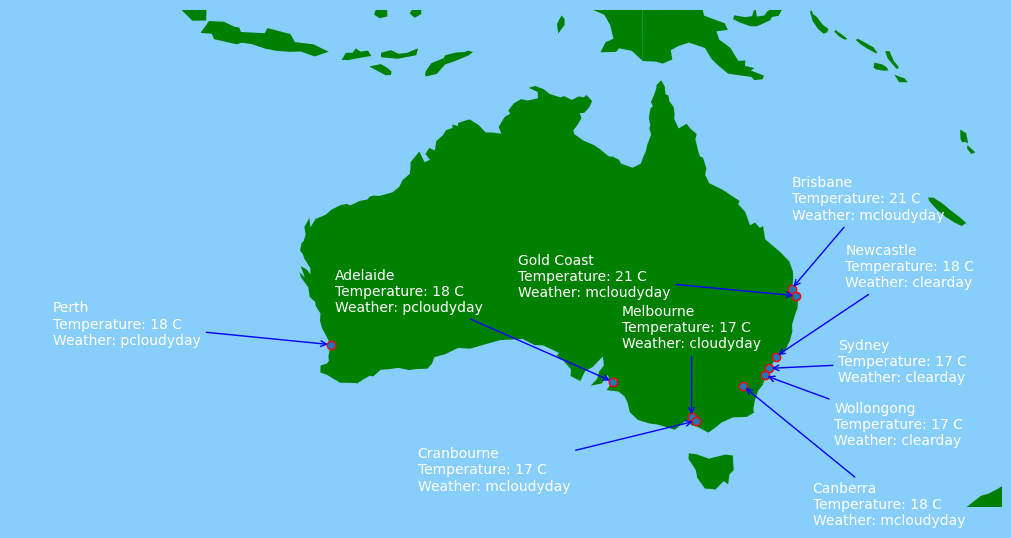

In [141]:
# world = gpd.read_file(
#     "https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/STE_2021_AUST_SHP_GDA2020.zip")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

plt.rcParams['figure.figsize']=(12.8,7.2)
plt.rcParams['figure.facecolor']='lightskyblue'
world.plot(color='green')
plt.xlim(90,170)
plt.ylim(-45,-5)
y=[float(cit_dict[i]["lat"]) for i in cit_dict.keys()]
x=[float(cit_dict[i]["lng"]) for i in cit_dict.keys()]
# ["Sydney","Melbourne","Brisbane","Perth","Adelaide","Gold Coast","Canberra","Cranbourne","Newcastle","Wollongong"]
for i,j in zip(x,y):
    for m in cit_dict.keys():
        xx=50
        yy=-50
        if float(cit_dict[m]["lat"])==j and  float(cit_dict[m]["lng"])==i:
            if m =="Adelaide":
                xx,yy=-200,50
            elif m=="Cranbourne":
                xx,yy=-200,-50
            elif m=="Perth":
                xx,yy=-200,-0
            elif m=="Melbourne":
                xx,yy=-50,50
            elif m=="Brisbane":
                xx,yy=0,50
            elif m=="Gold Coast":
                xx,yy=-200,-1
            elif m=="Canberra":
                xx,yy=50,-100
            elif m=="Sydney":
                xx,yy=50,-10
            elif m=="Newcastle":
                xx,yy=50,50
            elif m=="Wollongong":
                xx,yy=50,-50
            plt.annotate(m+"\nTemperature: "+str(cit_dict[m]["temperature"])+" C"+"\nWeather: "+cit_dict[m]["weather"],xy=[i,j],xycoords='data',xytext=(xx,yy),textcoords='offset points',fontsize=10,arrowprops=dict(arrowstyle="->",color='blue'),color='white')
            break
plt.axis('off')
plt.scatter(x,y,edgecolors="r")
plt.show()


In [122]:
from datetime import datetime

print(datetime.now())

2023-03-31 02:16:12.250178


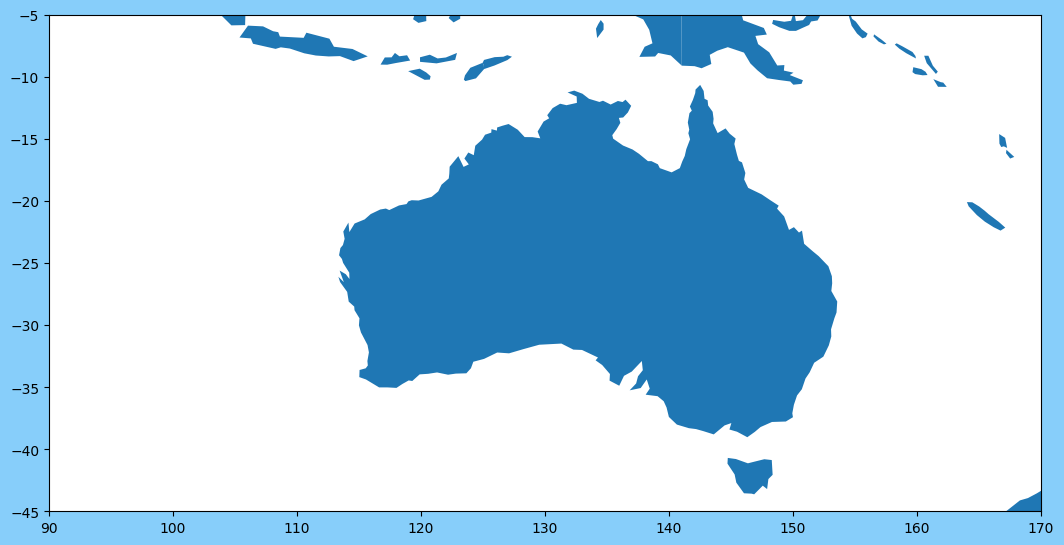

In [139]:
au_word = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
au_word.plot()
plt.xlim(90,170)
plt.ylim(-45,-5)
plt.show()